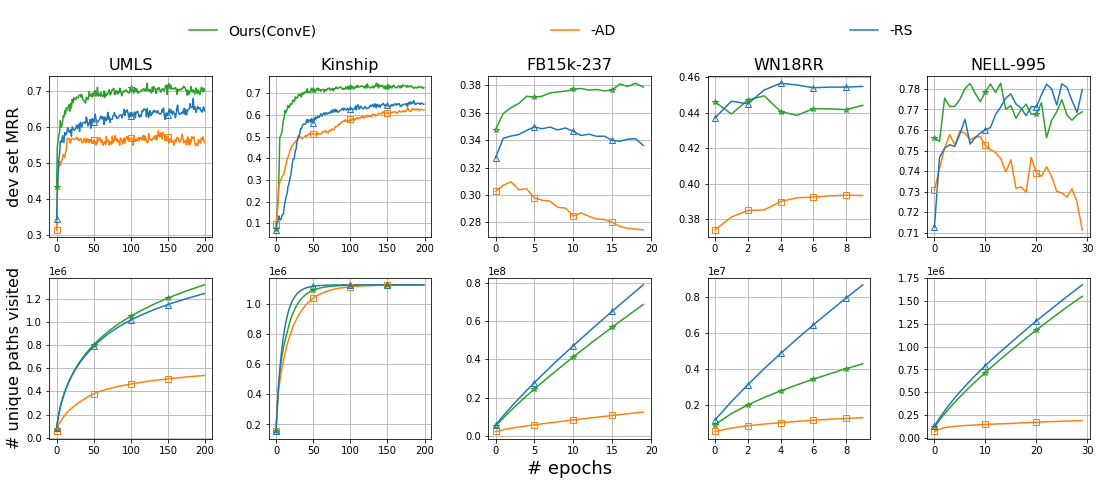

In [92]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

def read_data(dataset, metrics):
    model_dir = '/export/home/xilin/Projects/MultiHopKG/model'
    model_paths = {
        'umls': (
            'umls-point.rs.conve-xavier-n/a-200-200-3-0.001-0.1-0.0-0.95-400-0.05/',      # re-run
            'umls-point.rs.conve-xavier-n/a-200-200-3-0.001-0.1-0.0-0.0-400-0.05/',      # re-run
            'umls-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.9-400-0.05/'                # re-run
        ),
        'kinship': (
            'kinship-point.rs.conve-xavier-n/a-200-200-3-0.001-0.3-0.1-0.9-400-0.05/',   
            'kinship-point.rs.conve-xavier-n/a-200-200-3-0.001-0.3-0.1-0.0-400-0.05/',
            'kinship-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.9-400-0.05/'
        ),
        'fb15k-237': (
            'FB15K-237-point.rs.conve-xavier-n/a-200-200-3-0.001-0.3-0.1-0.5-400-0.02/',
            'FB15K-237-point.rs.conve-xavier-n/a-200-200-3-0.001-0.3-0.1-0.0-400-0.02/',
            'FB15K-237-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.5-400-0.02/'           # re-run
        ),
        'wn18rr': (
            'WN18RR-point.rs.conve-xavier-n/a-200-200-3-0.001-0.1-0.1-0.1-500-0.0/',     # re-run
            'WN18RR-point.rs.conve-xavier-n/a-200-200-3-0.001-0.1-0.1-0.0-500-0.0/',
            'WN18RR-point-xavier-n/a-200-200-3-0.001-0.5-0.3-0.5-500-0.0/'
        ),
        'nell-995': (
            'NELL-995-point.rs.conve-xavier-n/a-200-200-3-0.003-0.1-0.1-0.1-256-0.05/',  # re-run
            'NELL-995-point.rs.conve-xavier-n/a-200-200-3-0.003-0.1-0.1-0.0-256-0.05/',  # re-run
            'NELL-995-point-xavier-n/a-200-200-3-0.001-0.1-0.1-0.1-256-0.05/'            # re-run
        )
    }
    
    num_iterations = {
        'umls': 200,
        'kinship': 200,
        'fb15k-237': 20,
        'wn18rr': 10,
        'nell-995': 30
    }
    
    # y1
    with open(os.path.join(model_dir, model_paths[dataset][0], metrics + '.dat')) as f:
        y1 = [float(l.strip()) for l in f]
        y1 = y1[:num_iterations[dataset]]
    # y2
    with open(os.path.join(model_dir, model_paths[dataset][1], metrics + '.dat')) as f:
        y2 = [float(l.strip()) for l in f]
        y2 = y2[:num_iterations[dataset]]
    # y3
    with open(os.path.join(model_dir, model_paths[dataset][2], metrics + '.dat')) as f:
        y3 = [float(l.strip()) for l in f]
        y3 = y3[:num_iterations[dataset]]
    return y1, y2, y3

# plot with various axes scales
datasets = ['UMLS', 'Kinship', 'FB15k-237', 'WN18RR', 'NELL-995']
fig = plt.figure(figsize=(17, 6))

def print_dev_mrrs(dataset, subplot_id, marker_x=None, leftmost=False):
    plt.subplot(250 + subplot_id)
    y1, y2, y3 = read_data(dataset.lower(), 'dev_metrics')
    x = np.arange(len(y1))
    plt.plot(x, y1, color='#2ca02c')
    plt.plot(x, y2, color='#ff7f0e')
    plt.plot(x, y3, color='#1f77b4')
    if marker_x:
        marker_y1 = [y1[_x] for _x in marker_x]
        plt.plot(marker_x, marker_y1, color='#2ca02c', linestyle='None', marker='*', mfc='none')
        marker_y2 = [y2[_x] for _x in marker_x]
        plt.plot(marker_x, marker_y2, color='#ff7f0e', linestyle='None', marker='s', mfc='none')
        marker_y3 = [y3[_x] for _x in marker_x]
        plt.plot(marker_x, marker_y3, color='#1f77b4', linestyle='None', marker='^', mfc='none')
    plt.yscale('linear')
    if leftmost:
        plt.ylabel('dev set MRR', fontsize=16)
    plt.title(dataset, fontsize=16)
    plt.grid(True)

def print_num_unique_paths(dataset, subplot_id, marker_x=None, leftmost=False, show_xlabel=False, show_legend=False):
    plt.subplot(2, 5, subplot_id)
    y1, y2, y3 = read_data(dataset.lower(), 'num_path_types')
    x = np.arange(len(y1))
    label1 = 'Ours(ConvE)' if show_legend else None
    label2 = '-AD' if show_legend else None
    label3 = '-RS' if show_legend else None
    plt.plot(x, y1, color='#2ca02c', label=label1)
    plt.plot(x, y2, color='#ff7f0e', label=label2)
    plt.plot(x, y3, color='#1f77b4', label=label3)
    if marker_x:
        marker_y1 = [y1[_x] for _x in marker_x]
        plt.plot(marker_x, marker_y1, color='#2ca02c', linestyle='None', marker='*', mfc='none')
        marker_y2 = [y2[_x] for _x in marker_x]
        plt.plot(marker_x, marker_y2, color='#ff7f0e', linestyle='None', marker='s', mfc='none')
        marker_y3 = [y3[_x] for _x in marker_x]
        plt.plot(marker_x, marker_y3, color='#1f77b4', linestyle='None', marker='^', mfc='none')
    plt.yscale('linear')
    if leftmost:
        plt.ylabel('# unique paths visited', fontsize=16)
    if show_xlabel:
        plt.xlabel('# epochs', fontsize=18)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title('')
    plt.grid(True)
    if show_legend:
        lgd = fig.legend(bbox_to_anchor=(.15, 1., .6, .1), loc='center', frameon=False,
           ncol=5, mode='expand', borderaxespad=0, fontsize=14)

marker_xs = [
    [0, 50, 100, 150],
    [0, 50, 100, 150],
    [0, 5, 10, 15],
    [0, 2, 4, 6, 8],
    [0, 10, 20]
]
for i, dataset in enumerate(datasets):
    # dev set evaluation metrics
    print_dev_mrrs(dataset, i + 1, marker_xs[i], leftmost=(i == 0))
    # number of unique paths
    print_num_unique_paths(dataset, i + 6, marker_xs[i], leftmost=(i == 0), show_xlabel=(i==int(len(datasets)/2)), show_legend=(i==len(datasets)-1))

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, 
                    hspace=0.25, wspace=0.35)

plt.show()
# fig.tight_layout()
fig.savefig('action_dropout_effect.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')